## Ch08 대표적인 연속형 확률분포

- 정규분포를 비롯하여 추정이나 검정을 수행할 때, 사용하는 분포를 다양하게 살펴봅니다.
- 분포의 형태나 성질을 확실히 파악해둡시다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
from scipy.optimize import minimize_scalar

%precision 3
%matplotlib inline

In [2]:
linestyles = ['-', '--', ':']

def E(X, g=lambda x: x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

def check_prob(X):
    x_range, f = X
    f_min = minimize_scalar(f).fun
    assert f_min >= 0, 'density function is minus value'
    prob_sum = np.round(integrate.quad(f, -np.inf, np.inf)[0], 6)
    assert prob_sum == 1, f'sum of probability is {prob_sum}'
    print(f'expected vaue {E(X):.3f}')
    print(f'variance {V(X):.3f}')
    
def plot_prob(X, x_min, x_max):
    x_range, f = X
    def F(x):
        return integrate.quad(f, -np.inf, x)[0]

    xs = np.linspace(x_min, x_max, 100)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.plot(xs, [f(x) for x in xs],
            label='f(x)', color='gray')
    ax.plot(xs, [F(x) for x in xs],
            label='F(x)', ls='--', color='gray')

    ax.legend()
    plt.show()

## 8.1 정규분포
- 통계분석에서 매우 자주 사용되는 중요한 확률분포로 가우스분포(Gaussian distribution)이라고도 부른다.
- 정규분포의 파라미터는 $\mu, \sigma^2$ 두 가지임. 
- 정규분포 표현: $N(\mu,\sigma^2)$

#### 정규분포의 밀도함수 
$f(x)=\frac{1}{\sqrt{2\pi}\sigma}exp(-\frac{(x-\mu)^2}{2\sigma^2}) \quad (-\infty < x < \infty)$ 
- 평균과 표준편차를 입력으로 받아서 구간 적분을 하면 확률값 나옴

#### 정규분포의 기댓값과 분산
X ~ N($\mu,\sigma^2$)이라고 할때, 
$\\$
E(X)=$\mu$ $\quad$
V(X)=$\sigma^2$

#### 정규분포의 변환
- 임의의 실수 a,b에 대해서 X -> aX+b
$\\$
$aX+b$ ~ $N(a\mu+b, a^2\sigma^2)$

#### 표준정규분포: N(0,1)
- 정규화한 확률변수Z=$\frac{X-\mu}{\sigma}$
- 위의 식에 a, b를 대입하면됨 
$\\$
a=$\frac{1}{\sigma}$
b=$-\frac{\mu}{\sigma}$


In [3]:
def N(mu, sigma):
    x_range = [- np.inf, np.inf]
    def f(x):
        return 1 / np.sqrt(2 * np.pi * sigma**2) *\
                    np.exp(-(x-mu)**2 / (2 * sigma**2))
    return x_range, f

In [4]:
mu, sigma = 2, 0.5
X = N(mu, sigma)

In [5]:
check_prob(X)

expected vaue 2.000
variance 0.250


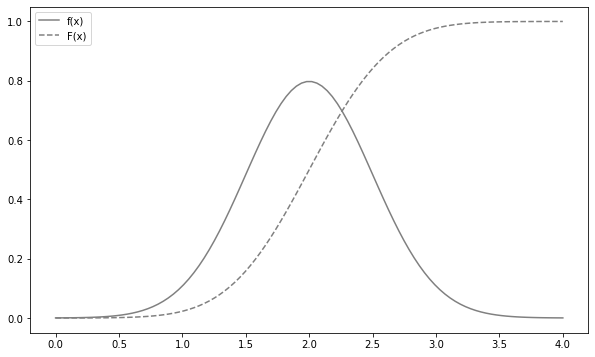

In [6]:
plot_prob(X, 0, 4)

In [7]:
#기대값이 2이고 표준편차가 0.5인 정규분포를 따르는 확률변수를 생성
rv = stats.norm(2, 0.5)

In [8]:
rv.mean(), rv.var()

(2.0, 0.25)

In [9]:
rv.pdf(2)

0.7978845608028654

In [10]:
# P(X<=1.7)
rv.cdf(1.7)

0.27425311775007355

In [11]:
# P(X>=x) = a
rv.isf(0.3) # 상위30%일때의 x위치

2.2622002563540207

In [12]:
rv.cdf(2.2622002563540207) # 70%확률이 나와야함

0.7000000000000002

In [13]:
# 평균을 중심으로 대칭된 양 지점을 구하는 식: 면적이 90%가 되게 함
rv.interval(0.9)

(1.1775731865242636, 2.822426813475736)

In [14]:
rv.isf(0.95), rv.isf(0.05)

(1.1775731865242638, 2.8224268134757367)

In [15]:
# 검증
print(rv.cdf(1.1775731865242636)) # 5%면적임. 
print(1-rv.cdf(2.822426813475736))

0.049999999999999975
0.050000000000000044


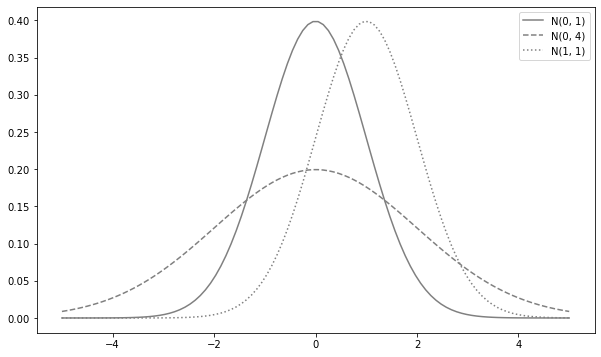

In [16]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-5, 5, 100)
params = [(0, 1), (0, 2), (1, 1)]
for param, ls in zip(params, linestyles):
    mu, sigma = param
    rv = stats.norm(mu, sigma)
    ax.plot(xs, rv.pdf(xs),
            label=f'N({mu}, {sigma**2})', ls=ls, color='gray')
ax.legend()

plt.show()

##### $\sigma^2$이 커짐에 따라 분포가 넓어지고
##### $\mu$가 변화하면 분포 전체가 평행이동하는 것을 확인할 수 있습니다




## 8.2 지수분포
- 지수분포(exponential distribution)는 어떤 사건이 발생하는 간격이 따르는 분포.
- 간격이라는 시간이 따르는 분포이므로, 확률변수가 취할 수 있는 값은 0이상의 실수입니다.
- 지수분포의 파라미터는 $\lambda$
- 지수분포 표시 Ex($\lambda$) 
- Ex($\lambda$)는 단위시간당 평균 $\lambda$번 발생하는 사건의 발생간격을 따르는 확률분포
- 포아송분포와 관련성이 강한 확률분포임

#### 지수분포의 밀도함수
- f(x)= $\lambda e^{-\lambda x} \quad (0 \le x)$

예시1)
- 하루평균 2건의 교통사고가 발생하는 지역이 있다면: Ex(2)
- 그 지역에서 3일 이내에 교통사고가 일어날 확률은? 
- $P(X \le 3) = \int_{0}^{3}2e^{-2x}dx$= 0.998 

예시2)
- 1시간당 평균 10번 접속하는 사이트: Ex(10)
- 그 사이트에 접속발생이후, 1분 이내에 접속할 확률 확률은? 
- $P(X \le \frac{1}{60}) = \int_{0}^{\frac{1}{60}}10e^{-10x}dx$= 0.154

#### 지수분포의 기댓값과 분산
X ~ Ex($\lambda$)라고 할때
$\\$
E(X) = $\frac{1}{\lambda}  \quad V(X)= \frac{1}{\lambda^{2}} $

In [17]:
def Ex(lam):
    x_range = [0, np.inf]
    def f(x):
        if x >= 0:
            return lam * np.exp(-lam * x)
        else:
            return 0
    return x_range, f

In [18]:
lam = 3
X = Ex(lam)

In [19]:
check_prob(X)

expected vaue 0.333
variance 0.111


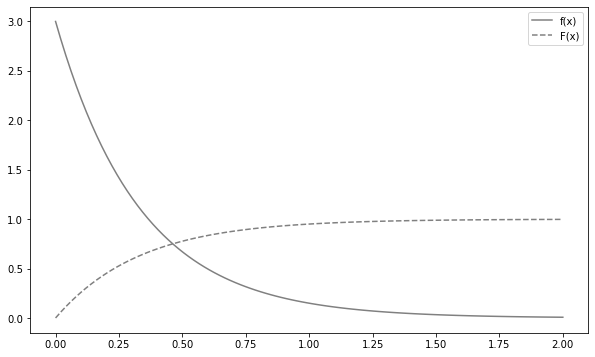

In [20]:
# lambda가 3인 지수분포를 [0,2]구간 그려봄
plot_prob(X, 0, 2)

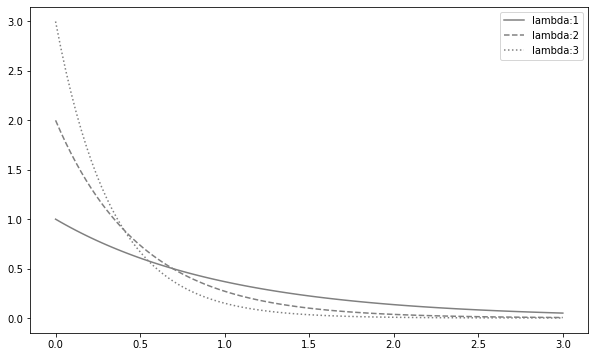

In [21]:
# lambda를 1,2,3으로 변화시키면서 그려봄
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 3, 100)
for lam, ls in zip([1, 2, 3], linestyles):
    rv = stats.expon(scale=1/lam)
    ax.plot(xs, rv.pdf(xs),
            label=f'lambda:{lam}', ls=ls, color='gray')
ax.legend()

plt.show()

## 8.3 카이제곱분포
- 좌우비대칭으로, 왼쪽으로 치우치고 오른쪽으로 넓어집니다. 
- 자유도가 커지면 좌우대칭에 가까워집니다. 
- 자유도의 값 가까지에 분포의 정점이 있습니다

rv.pdf(2) # 밀도함수 값

rv.cdf(1.7) # 분포함수

rv.isf(0.3) # 상위 30%의 point

rv.interval(0.9) # 90%의 구간 범위 구하기

rv.isf(0.95), rv.isf(0.05) # 90%의 구간을 구하는 것과 같음


In [22]:
n = 10
rv = stats.norm()
sample_size = int(1e6)
# 표준정규분포로부터 10×100만 사이즈로 무작위추출
Zs_sample = rv.rvs((n, sample_size)) # rvs(size) 난수 발생
print(Zs_sample.shape) # (10, 1000000)
# axis=0에서 총합을 구하고, 표준정규분포의 제곱합 표본 데이터를 구한다
chi2_sample = np.sum(Zs_sample**2, axis=0)
print(chi2_sample.shape) # (1000000,)

(10, 1000000)
(1000000,)


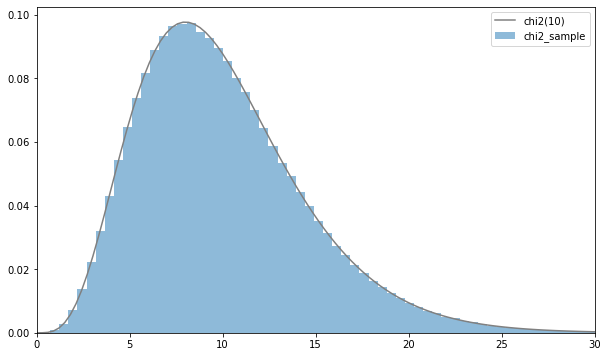

In [23]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# n은 앞에 나옴 
rv_true = stats.chi2(n)
xs = np.linspace(0, 30, 100)
ax.hist(chi2_sample, bins=100, density=True,
        alpha=0.5, label='chi2_sample')
ax.plot(xs, rv_true.pdf(xs), label=f'chi2({n})', color='gray')

ax.legend()
ax.set_xlim(0, 30)
plt.show()

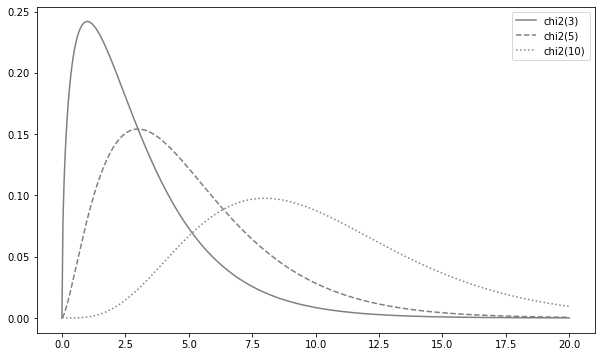

In [24]:
# 확률밀도함수 
# - 누적합=1
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 20, 500)
for n, ls in zip([3, 5, 10], linestyles):
    rv = stats.chi2(n)
    ax.plot(xs, rv.pdf(xs),
            label=f'chi2({n})', ls=ls, color='gray')
    
ax.legend()
plt.show()

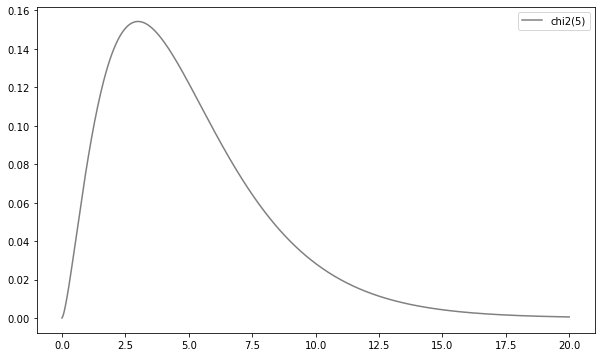

In [25]:
# 확률밀도함수 
# - 누적합=1
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 20, 500)
for n, ls in zip([5], linestyles):
    rv = stats.chi2(n)
    ax.plot(xs, rv.pdf(xs),
            label=f'chi2({n})', ls=ls, color='gray')
    
ax.legend()
plt.show()

In [26]:
rv = stats.chi2(5)
print(rv.isf(0.05),rv.isf(0.95))

11.070497693516355 1.1454762260617697


## 8.4 t분포
- 표준정규분포와 카이제곱분포로 t분포를 만듬
- t분포가 취할 수 있는 값은 실수 전체. 

t분포의 특징 
- 좌우대칭인 분포입니다 
- 표준정규분포보다 양쪽 끝이 두껍습니다. 
- 자유도가 커지면 표준정규분포에 가까워집니다. 

In [27]:
# t분포를 직접 코딩해서 구현 
n = 10
rv1 = stats.norm()
rv2 = stats.chi2(n)

sample_size = int(1e6)
Z_sample = rv1.rvs(sample_size)
chi2_sample = rv2.rvs(sample_size)

t_sample = Z_sample / np.sqrt(chi2_sample/n)
print(Z_sample.shape, chi2_sample.shape, t_sample.shape)
print(Z_sample, chi2_sample,t_sample)

(1000000,) (1000000,) (1000000,)
[ 0.336  0.223  0.581 ...  0.276 -0.066 -1.391] [14.332 18.645  8.808 ... 16.078 15.434 10.155] [ 0.28   0.163  0.619 ...  0.218 -0.053 -1.381]


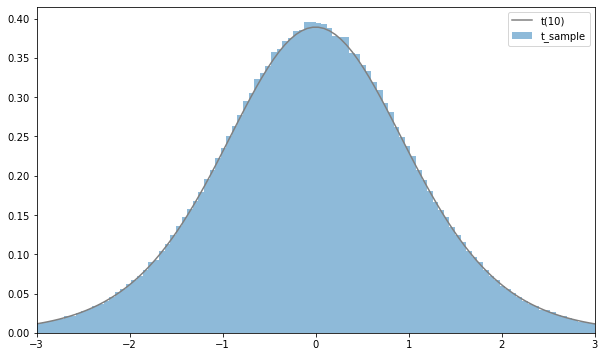

In [28]:
# t분포 직접구현 vs stats구현 비교
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.t(n)
xs = np.linspace(-3, 3, 100)
ax.hist(t_sample, bins=100, range=(-3, 3),
        density=True, alpha=0.5, label='t_sample')
ax.plot(xs, rv.pdf(xs), label=f't({n})', color='gray')

ax.legend()
ax.set_xlim(-3, 3)
plt.show()

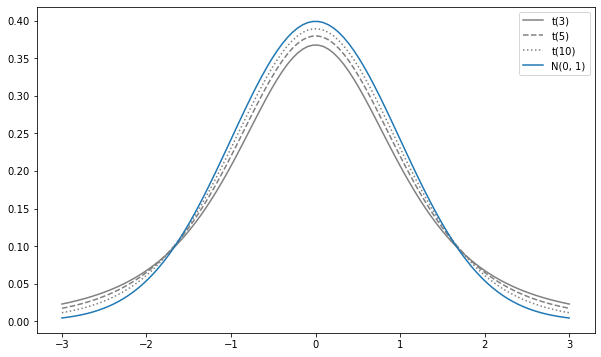

In [29]:
# t분포가 자유도n에 따라 어떤 분포 형태가 되는지 살펴봄 
# t분포의 자유도가 커지면 커질수록 표준정규분포와 같아진다. 
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(-3, 3, 100)
for n, ls in zip([3, 5, 10], linestyles):
    rv = stats.t(n)
    ax.plot(xs, rv.pdf(xs),
            label=f't({n})', ls=ls, color='gray')
rv = stats.norm()
ax.plot(xs, rv.pdf(xs), label='N(0, 1)')
    
ax.legend()
plt.show()

In [30]:
rv = stats.t(5)
rv.isf(0.05)

2.0150483726691575

## 8.5 F분포
- 서로 독립인 두개의 카이제곱분포에 의해 정의
- F(n1,n2) >= 0 

F분포 특징
- 좌우비대칭으로, 왼쪽으로 치우치고 오른쪽으로 넓어지는 분포입니다. 
- 분포의 정점은 1에 가깝습니다. 

In [31]:
# F(5,10) 직접구현 
n1 = 5
n2 = 10
rv1 = stats.chi2(n1)
rv2 = stats.chi2(n2)

sample_size = int(1e6)
sample1 = rv1.rvs(sample_size)
sample2 = rv2.rvs(sample_size)

f_sample = (sample1/n1) / (sample2/n2)

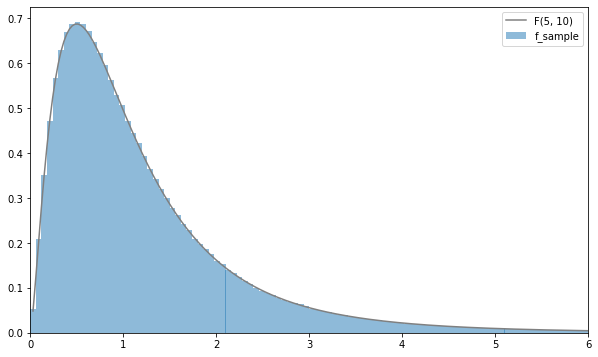

In [32]:
# F분포구현: scipy.stats이용 
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

rv = stats.f(n1, n2)
xs = np.linspace(0, 6, 200)[1:]
ax.hist(f_sample, bins=100, range=(0, 6),
        density=True, alpha=0.5, label='f_sample')
ax.plot(xs, rv.pdf(xs), label=f'F({n1}, {n2})', color='gray')

ax.legend()
ax.set_xlim(0, 6)
plt.show()

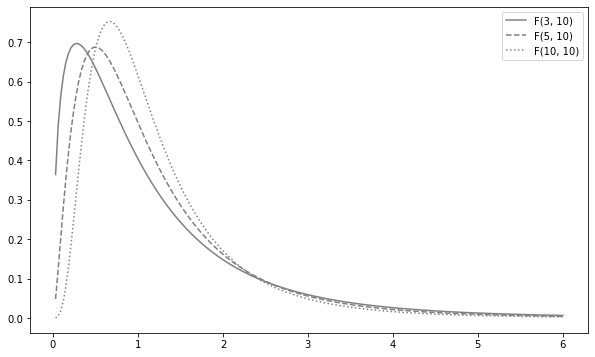

In [33]:
# F(n1,10)에서 n1을 3,5,10으로 변경 
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 6, 200)[1:]
for n1, ls in zip([3, 5, 10], linestyles):
    rv = stats.f(n1, 10)
    ax.plot(xs, rv.pdf(xs),
            label=f'F({n1}, 10)', ls=ls, color='gray')
    
ax.legend()
plt.show()